# ABU 量化系统  简介（版本 0.1）


* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'

## 第九部分 解决方案C

## ‘非均衡胜负收益’带来的必然’非均衡胜负比例‘，目标由’因子‘的能力解决一部分，’模式识别‘提升关键的一部分

In [1]:
import ZEnv
import ZLog
import ZCommonUtil
import pandas as pd
pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
fn = './data/cache/orders_pd_ump_hit_predict_abu'
key = 'orders_pd_ump_hit_predict_abu'
orders_pd_ump = ZCommonUtil.load_hdf5(fn, key)

这里的orders_pd_ump数据由 Factor中的各个裁决组成pipeline具体请查询代码


            g_pp_dict = {
            UmpMainClass(None, MlFiterMainPdClass, predict=True): {'w_col': MlFiterMainPd.g_w_col, 'need_ind_cnt': 1},
            UmpMainClass(None, MlFiterWavePdClass, predict=True): {'w_col': MlFiterWavePd.g_w_col, 'need_ind_cnt': 1},
            UmpMainClass(None, MlFiterDegPdClass, predict=True): {'w_col': MlFiterDegPd.g_w_col, 'need_ind_cnt': 1},

            UmpJumpClass(None, MlFiterJumpPdClass, predict=True): {'w_col': MlFiterJumpPd.g_w_col, 'need_ind_cnt': 1,
                                                                   'cons': lambda order: order['diff_days'] < 21},

            UmpEdgeClass(None, predict=True): {}
            }
            
            g_pipe_line = UmpPipeLineClass(g_pp_dict)

**UmpEdge 边裁**

In [12]:
import UmpEdge

In [13]:
ump_edge = UmpEdge.UmpEdgeClass(orders_pd_ump)

**边裁使用profit， profit_cg作为gmm分类数据生成ss分类序列，之后根据profit_cg进行rank数据生成p_rk_cg，在找到top winN，top loss
N N现在的设置是25%且对外不暴露，分别给于1， -1, 其它的都是0生成rk列，将atr，deg，wave所有数据的mumpy矩阵保存起来，对输入的数据进行标准化后实行距离对比，找到最匹配的
rk标签**


1. 优化距离对比方法现在是pairwise_distances，相似度，协整等方式
2. 类似knn，找k个相思点投票，不止先只有一个

In [14]:
ump_edge.fiter.df.head()

,profit,profit_cg,atr_std,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,wave_score1,wave_score2,wave_score3
2015-07-28,21051.90,0.105290,0.045208,-1.256691,3.895622,5.363046,0.116619,-0.122372,-0.222840
2015-07-28,-8411.46,-0.043313,0.234763,15.908454,4.108007,4.199374,0.646118,0.731843,0.662114
2015-07-28,-19158.06,-0.095806,-0.408504,21.175689,3.394158,7.384808,0.050669,-0.131306,-0.158877
2015-07-28,-5845.79,-0.074492,0.687850,-7.023154,-0.075254,5.413456,0.671606,0.799534,0.829494
2015-07-28,12345.00,0.061728,0.011969,11.519025,3.621430,5.765467,-0.149591,-0.227755,-0.259943


rk        -1         0    1
ss                         
0   1.000000  0.000000  0.0
6   1.000000  0.000000  0.0
7   0.892651  0.107349  0.0
9   1.000000  0.000000  0.0
19  1.000000  0.000000  0.0
rk   -1    0    1
ss               
2   0.0  0.0  1.0
4   0.0  0.0  1.0
5   0.0  0.0  1.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
13  0.0  0.0  1.0
16  0.0  0.0  1.0
18  0.0  0.0  1.0


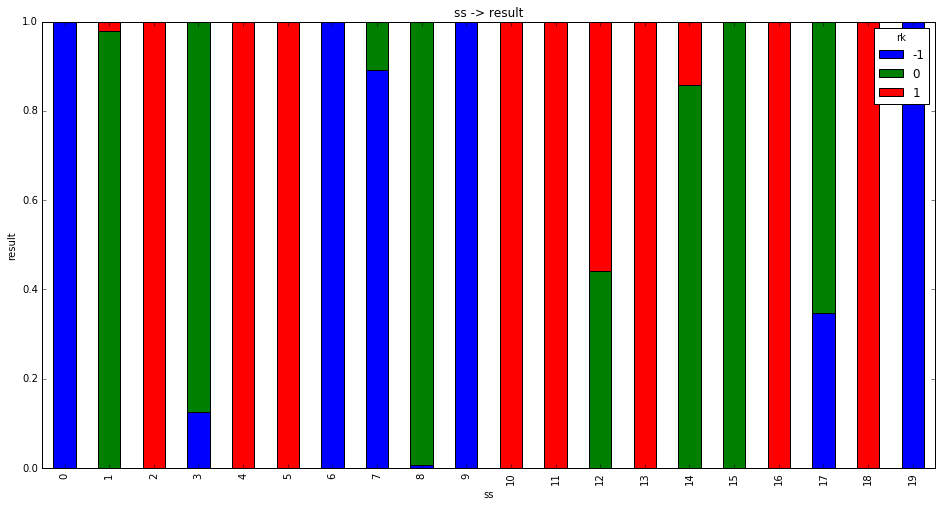

In [15]:
xt, xt_pct = ump_edge.gmm_component_filter()

In [16]:
xt

rk,-1,0,1
ss,,,
0,2465,0,0
1,0,4475,92
2,0,0,4
3,639,4472,0
4,0,0,3053
5,0,0,33
6,47,0,0
7,3243,390,0
8,37,4865,0


In [17]:
xt_pct

rk,-1,0,1
ss,,,
0,1.000000,0.000000,0.000000
1,0.000000,0.979855,0.020145
2,0.000000,0.000000,1.000000
3,0.125024,0.874976,0.000000
4,0.000000,0.000000,1.000000
5,0.000000,0.000000,1.000000
6,1.000000,0.000000,0.000000
7,0.892651,0.107349,0.000000
8,0.007548,0.992452,0.000000


In [18]:
ump_edge.dump_clf()

**利用测试裁决数据，寻找最优裁决参数**

In [106]:
import ast
def map_str_dict(extra_info, key):
    try:
        map_ast = ast.literal_eval(extra_info)[key]
    except Exception, e:
        import pdb
        pdb.set_trace()
        raise e
    return map_ast

def extra_info_to_pd(orders_pd):
    orders_pd['ump_main_mlfitermainpdclass_predict'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfitermainpdclass_predict',))
    orders_pd['ump_main_mlfiterdegpdclass_predict'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfiterdegpdclass_predict',))
    orders_pd['ump_main_mlfiterwavepdclass_predict'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfiterwavepdclass_predict',))
    orders_pd['ump_jump_mlfiterjumppdclass_predict'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_jump_mlfiterjumppdclass_predict',))

    orders_pd['ump_main_mlfitermainpdclass_hit'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfitermainpdclass_hit',))
    orders_pd['ump_main_mlfiterdegpdclass_hit'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfiterdegpdclass_hit',))
    orders_pd['ump_main_mlfiterwavepdclass_hit'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_main_mlfiterwavepdclass_hit',))
    orders_pd['ump_jump_mlfiterjumppdclass_hit'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('./data/cache/ump_jump_mlfiterjumppdclass_hit',))

# extra_info_to_pd(orders_pd_ump)

In [107]:
ZLog.info(orders_pd_ump.shape)
orders_pd_ump.tail(2)

(47374, 40)


,buy Date,buy Price,buy Cnt,buyFactor,Sell Date,Sell Price,Sell Type,Symbol,MaxLoss,ExtraInfo,key,profit,result,sell_type_extra,R,sharpe,profit_cg,profit_cg_hunder,keep_days,lowBkCnt,his_miss_days,atr_std,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,jump_power,diff_days,wave_score1,wave_score2,wave_score3,symbol_index,ump_main_mlfitermainpdclass_predict,ump_main_mlfiterdegpdclass_predict,ump_main_mlfiterwavepdclass_predict,ump_jump_mlfiterjumppdclass_predict,ump_main_mlfitermainpdclass_hit,ump_main_mlfiterdegpdclass_hit,ump_main_mlfiterwavepdclass_hit,ump_jump_mlfiterjumppdclass_hit,ind_key
2012-07-12,20120712,22.465,8902,BuyGoldenFactorClass:42,20120720,23.75,win,usPFE,20.90,{'./data/cache/ump_jump_mlfiterjumppdclass_pre...,497,11439.07,1,BuyGoldenFactorClass:42: winPrice :above950,0.821086,3.8237,0.05720,5.720009,8,1,0,0.373831,12.933343,1.104452,-0.163254,-1.096786,16,0.027985,-0.042228,-0.140315,6,True,True,True,True,0,0,0,0,47372
2012-07-16,20120716,3.155,63391,BuyGoldenFactorClass:42,20120719,2.58,loss,usBAMM,2.25,{'./data/cache/ump_jump_mlfiterjumppdclass_pre...,499,-36449.82,-1,mv_pre_atr preClose 2.0,-0.635359,-1.67571,-0.18225,-18.225037,3,1,0,0.025823,8.891965,0.686205,7.232708,-1.260642,73,-0.213653,-0.317415,-0.258648,6,True,True,True,True,0,0,0,0,47373


In [11]:
from MlFiter import MlFiterClass
import numpy as np

**寻找主裁最优参数**

In [12]:
orders_pd_ump['ind_key'] = np.arange(0, len(orders_pd_ump))
orders_pd_tmp = orders_pd_ump.filter(regex='result|ump_main_mlfiter*|ind_key')
order_has_ret = orders_pd_tmp[orders_pd_tmp['result'] <> 0]
order_has_ret['result'] = np.where(order_has_ret['result'] == -1, 0, 1)

order_has_ret['ump_main_mlfitermainpdclass_predict'] = np.where(order_has_ret['ump_main_mlfitermainpdclass_predict'] == True, 1, 0)
order_has_ret['ump_main_mlfiterdegpdclass_predict'] = np.where(order_has_ret['ump_main_mlfiterdegpdclass_predict'] == True, 1, 0)
order_has_ret['ump_main_mlfiterwavepdclass_predict'] = np.where(order_has_ret['ump_main_mlfiterwavepdclass_predict'] == True, 1, 0)
# order_has_ret['ump_main_mlfiterjumppdclass_predict'] = np.where(order_has_ret['ump_main_mlfiterjumppdclass_predict'] == True, 1, 0)

order_has_ret = order_has_ret[(order_has_ret['ump_main_mlfitermainpdclass_predict'] == 0) | 
                              (order_has_ret['ump_main_mlfiterdegpdclass_predict'] == 0) | 
                              (order_has_ret['ump_main_mlfiterwavepdclass_predict'] == 0)]

order_has_ret['predict_sum'] = order_has_ret['ump_main_mlfitermainpdclass_predict'] + order_has_ret['ump_main_mlfiterdegpdclass_predict'] + \
            order_has_ret['ump_main_mlfiterwavepdclass_predict']

order_has_ret['hit_sum'] = order_has_ret['ump_main_mlfiterdegpdclass_hit'] + order_has_ret['ump_main_mlfitermainpdclass_hit'] + \
            order_has_ret['ump_main_mlfiterdegpdclass_hit']
    
matrix = order_has_ret.as_matrix()
y = matrix[:, 0]
x = matrix[:, 1:]
fiter = MlFiterClass(x, y, order_has_ret)
fiter.df.head()
order_has_ret.head()

,result,ump_main_mlfitermainpdclass_predict,ump_main_mlfiterdegpdclass_predict,ump_main_mlfiterwavepdclass_predict,ump_main_mlfitermainpdclass_hit,ump_main_mlfiterdegpdclass_hit,ump_main_mlfiterwavepdclass_hit,ind_key,predict_sum,hit_sum
2015-07-28,0,0,1,1,7,0,0,523,2,7
2015-07-28,0,1,0,1,0,25,0,524,2,50
2015-07-28,0,1,1,0,0,0,1,540,2,0
2015-07-28,0,0,1,1,3,0,0,547,2,3
2015-07-28,0,0,1,1,1,0,0,549,2,1


In [111]:
fiter.estimator.svc()
# fiter.estimator.random_forest_classifier()
# fiter.estimator.bagging_classifier()
fiter.cross_val_accuracy_score()

accuracy mean: 0.636323529412


array([ 0.6375    ,  0.6375    ,  0.63865546,  0.63865546,  0.62605042,
        0.63445378,  0.63445378,  0.63865546,  0.63865546,  0.63865546])

**1个hit以上就上0.65 20个hit 0.70以上，> 20个就可以直接使用裁决了，小于的等待，辅助裁判，边裁**

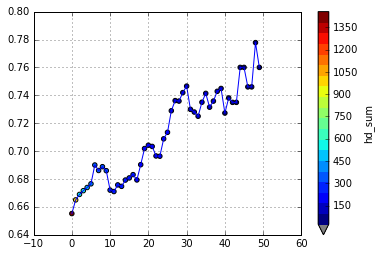

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

hd_range = np.arange(0, 50)
hd_result = []
hd_sum = []
for hd in hd_range:
    # xt = order_has_ret[(order_has_ret['hit_sum'] > hd) & (order_has_ret['predict_sum'] > 1)]['result'].value_counts()
    xt = order_has_ret[(order_has_ret['hit_sum'] > hd)]['result'].value_counts()
    hs = xt.sum()
    hd_sum.append(hs)
    hd_result.append(float(xt[0])/hs)
    
cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
fig, ax = plt.subplots()
ax.plot(hd_range, hd_result)
cax = ax.scatter(hd_range, hd_result, c=hd_sum, cmap=cmap, vmin=np.min(hd_sum),
                 vmax=np.max(hd_sum))
ax.grid(True)
fig.colorbar(cax, label='hd_sum', extend='min')

**本身数据就少，辅助裁判尽量裁决 jump ump可以使用hit 5作为阀值，大于5个hit直接裁决，否则等待边裁**

[ 0  1  2  3  4  7  8 15 18]


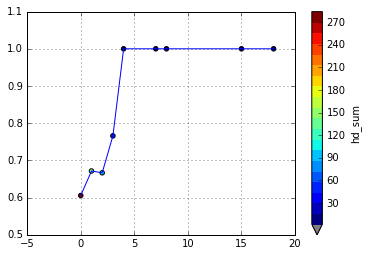

In [119]:
orders_pd_tmp = orders_pd_ump.filter(regex='result|ump_jump_mlfiter|ind_key*')
order_has_ret = orders_pd_tmp[orders_pd_tmp['result'] <> 0]
order_has_ret['result'] = np.where(order_has_ret['result'] == -1, 0, 1)
order_has_ret['ump_jump_mlfiterjumppdclass_predict'] = np.where(order_has_ret['ump_jump_mlfiterjumppdclass_predict'] == True, 1, 0)

order_has_ret = order_has_ret[(order_has_ret['ump_jump_mlfiterjumppdclass_predict'] == 0)]

hd_range = np.unique(order_has_ret['ump_jump_mlfiterjumppdclass_hit'])[:-1]
# -1 要使用0开始的范围
hd_range = np.array(hd_range) - 1
print hd_range
hd_result = []
hd_sum = []
for hd in hd_range:
    xt = order_has_ret[order_has_ret['ump_jump_mlfiterjumppdclass_hit'] > hd]['result'].value_counts()
    hs = xt.sum()
    hd_sum.append(hs)
    hd_result.append(float(xt[0])/hs)
    
cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
fig, ax = plt.subplots()
ax.plot(hd_range, hd_result)
cax = ax.scatter(hd_range, hd_result, c=hd_sum, cmap=cmap, vmin=np.min(hd_sum),
                 vmax=np.max(hd_sum))
ax.grid(True)
fig.colorbar(cax, label='hd_sum', extend='min')

In [120]:
jump_hit_pd = order_has_ret[order_has_ret['ump_jump_mlfiterjumppdclass_hit'] < 3]
jump_hit_pd_org = orders_pd_ump.iloc[jump_hit_pd['ind_key']]

In [ ]:
def apply_judge(order):
    return ump_edge.predict(atr_std=order.atr_std, deg_hisWindowPd=order.deg_hisWindowPd, deg_windowPd=order.deg_windowPd,
                 deg_60WindowPd=order.deg_60WindowPd, wave_score1=order.wave_score1, wave_score2=order.wave_score2,
                 wave_score3=order.wave_score3)
jump_hit_pd['edge'] = jump_hit_pd_org.apply(apply_judge, axis=1)

In [122]:
jump_hit_pd['edge'].value_counts()

 0    175
-1     12
 1      7
Name: edge, dtype: int64

**这里边裁的裁决只是为了验证正确性，由于边裁predict使用的是输入于原始数据矩阵的度量判断， 如果对裁决范围数量不满意，可以修改
edge top loss，top win范围**

        con_x = np.concatenate((x, dump_clf['fiter_x']), axis=0)
        x_scale_param = self.scaler.fit(con_x)
        con_x = self.scaler.fit_transform(con_x, x_scale_param)
        distance_min_ind = pairwise_distances(con_x[0].reshape(1, -1), con_x[1:],
                                              metric='euclidean').argmin()

In [123]:
from sklearn import metrics
jump_hit_pd['result2'] = np.where(jump_hit_pd['result'] == 0, -1, 1)
metrics.accuracy_score(jump_hit_pd[jump_hit_pd['edge'] == -1]['result2'],
                                           jump_hit_pd[jump_hit_pd['edge'] == -1]['edge'])

1.0

In [124]:
metrics.accuracy_score(jump_hit_pd[jump_hit_pd['edge'] == 1]['result2'],
                                           jump_hit_pd[jump_hit_pd['edge'] == 1]['edge'])

1.0

In [18]:
main_hit_pd = order_has_ret[order_has_ret['hit_sum'] < 20]
main_hit_pd_org = orders_pd_ump.iloc[main_hit_pd['ind_key']]
main_hit_pd_org.shape

(2166, 40)

In [19]:
main_hit_pd['edge'] = main_hit_pd_org.apply(apply_judge, axis=1)

In [20]:
main_hit_pd['edge'].value_counts()

 0    1298
-1     557
 1     311
Name: edge, dtype: int64

In [132]:
main_hit_pd['result2'] = np.where(main_hit_pd['result'] == 0, -1, 1)
metrics.accuracy_score(main_hit_pd[main_hit_pd['edge'] == -1]['result2'],
                                           main_hit_pd[main_hit_pd['edge'] == -1]['edge'])

1.0

all fit order = (44906, 40)
win rate = 0.500757137131
profit_cg.sum() = 272.117613217
win mean = 0.0743788075658 loss_mean = -0.0626291433739 


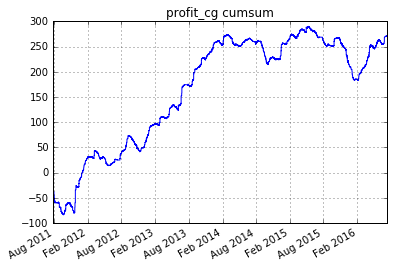

In [24]:
from UmpMain import UmpMainClass
from MlFiterGoldenPd import MlFiterGoldenPdClass
UmpMainClass(orders_pd_ump, MlFiterGoldenPdClass).show_general()